In [1]:
from IPython.display import display, HTML, clear_output
display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 80%; }    div#maintoolbar-container { width: 80%; }
</style>
"""))
import numpy as np
import scipy
import matplotlib.pyplot as plt; plt.ioff()
from matplotlib import animation
from collections import Counter
import matplotlib
from time import sleep
from IPython.display import HTML
# %matplotlib nbagg

In [2]:
def estimate_pi_animation(iters, batch):
    tally, pies = [], []
    circle1 = plt.Circle((0, 0), 1, color=None, ec='k', alpha=0.5);
    fig, ax = plt.subplots(figsize=(16,7.3), ncols=2);
    plt.close(fig);
    ax[0].add_artist(circle1)
    ax[0].set_ylim(-1,1)
    ax[0].set_xlim(-1,1)
    textstr = r'$\pi\approx{}$'.format(0)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    t1 = ax[0].text(0.05, 0.95, textstr, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax[1].set_xlim(0, iters)
    ax[1].set_ylim(3.10, 3.2)
    ax[1].axhline(np.pi, c='k');
    fargs=(fig, ax[0], ax[1], batch, tally, pies, t1)
    anim = animation.FuncAnimation(fig, _update_plot, frames=iters, fargs=fargs, interval=50)
    return anim

def _update_plot(i, fig, scatter, line, batch, tally, pies, t1):
    scatter = fig.axes[0]
    line = fig.axes[1]
    for _ in range(batch):
        coords = scipy.random.uniform(-1,1, (2, batch))
        res = np.sqrt(np.sum(coords**2, axis=0)) < 1
        tally.extend(res)

    scatter.scatter(coords[0], coords[1], s=1, c='k', alpha=0.4)
        
    pi = (4*Counter(tally)[True])/len(tally)
    textstr = r'$\pi\approx{:.9f}$'.format(pi)
    t1.set_text(textstr)
    pies.append(pi)
    line.plot(np.array(range(0,len(pies))), np.array(pies), c='r')
    return scatter, line

In [3]:
anim = estimate_pi_animation(iters=200, batch=50)
HTML(anim.to_html5_video())

In [50]:
anim.save('im.mp4')

### Scratch....

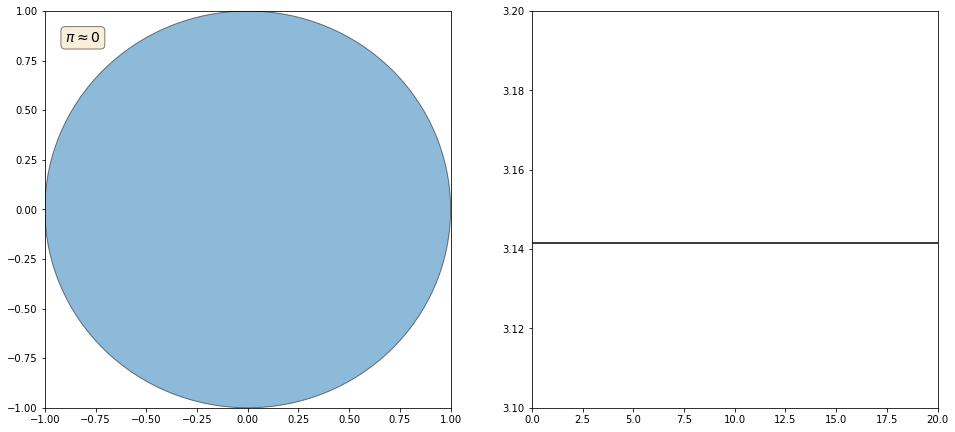

In [55]:
tally, pies = [], []
iters = 20
batch = 50
circle1 = plt.Circle((0, 0), 1, color=None, ec='k', alpha=0.5)
fig, ax = plt.subplots(figsize=(16,7.3), ncols=2)
ax[0].add_artist(circle1)
ax[0].set_ylim(-1,1)
ax[0].set_xlim(-1,1)
textstr = r'$\pi\approx{}$'.format(0)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
t1 = ax[0].text(0.05, 0.95, textstr, transform=ax[0].transAxes, fontsize=14,
    verticalalignment='top', bbox=props)

ax[1].set_xlim(0, iters)
ax[1].set_ylim(3.10, 3.2)
ax[1].axhline(np.pi, c='k');

In [56]:
anim = animation.FuncAnimation(fig, _update_plot, frames=iters, fargs=(fig, ax[0], ax[1], batch), interval=50)

In [57]:
HTML(anim.to_html5_video())

In [2]:
tally = []
for i in range(500000):
    x, y = scipy.random.randint(-100,100, 2)/100
    tally.append(np.abs(np.sqrt(np.sum(scipy.rand(2)**2))) <= 1)